<h1 style="
    color: white; 
    background-color: #ff4081; 
    font-family: Arial, sans-serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #ff1744;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
üìå Importing Libraries
</h1>


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

<h1 style="
    color: white; 
    background-color: #3f51b5; 
    font-family: 'Trebuchet MS', sans-serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #1a237e;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
üìÇ Loading Dataset
</h1>


In [5]:
df=pd.read_csv('gld_price_data.csv')
df.head()

Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099

<h1 style="
    color: black; 
    background-color: #ffeb3b; 
    font-family: Verdana, sans-serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #fbc02d;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
üîç Understanding Data
</h1>


In [7]:
df.shape

(2290, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
df.describe()

SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798

In [13]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
df.select_dtypes(exclude=object).corr()

SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000

<Axes: >

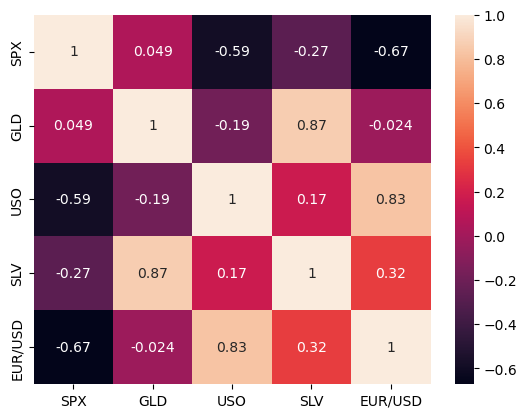

In [25]:
sns.heatmap(df.select_dtypes(exclude=object).corr(),annot=True)

C:\Users\rubha\AppData\Local\Temp\ipykernel_43712\3030281137.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

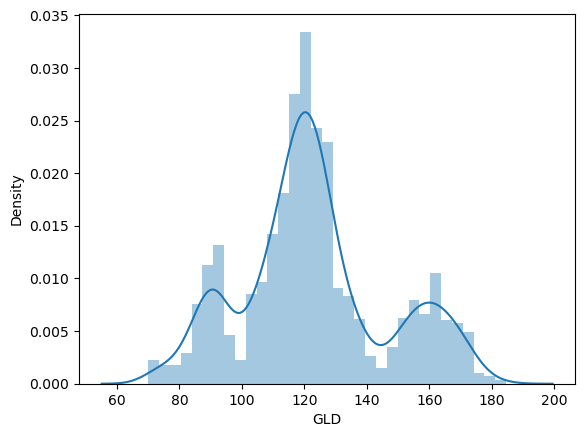

In [29]:
sns.distplot(df['GLD'])

<h1 style="
    color: white; 
    background-color: #673ab7; 
    font-family: Georgia, serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #4527a0;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
üìä Splitting DataSet
</h1>


In [31]:
X=df.drop(columns=['Date','GLD'],axis=1)
y=df['GLD']

In [33]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

<h1 style="
    color: white; 
    background-color: #4caf50; 
    font-family: 'Courier New', monospace; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #2e7d32;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
üöÄ Model Training
</h1>


In [39]:
lr = LinearRegression()
rfr=RandomForestRegressor(n_estimators=60, random_state=2)
ab=AdaBoostRegressor(n_estimators=80, random_state=2)
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor(max_depth=7)
xg=XGBRegressor(n_estimators=12,random_state=23)

In [41]:
clfs={
    "Linear":lr,
    "RandomForest":rfr,
    "AdaBoost":ab,
    "KNN":knn,
    "DT":dt,
    "XGB":xg  
}

<h1 style="
    color: black; 
    background-color: #ffc107; 
    font-family: Impact, sans-serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #ff9800;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
üìà Model Evaluation & Results
</h1>


In [65]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    prf=r2_score(y_test, y_pred)
    
    return prf

In [67]:
train_classifier(xg,X_train,y_train,X_test,y_test)

0.9833752907810909

In [69]:
r2_scores = []
for name,clf in clfs.items():
    
    current_r2s = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_r2s)
    
    
    r2_scores.append(current_r2s)
    

For  Linear
Accuracy -  0.8657886565869237
For  RandomForest
Accuracy -  0.9883000537234434
For  AdaBoost
Accuracy -  0.9424751607542555
For  KNN
Accuracy -  0.9338987197131254
For  DT
Accuracy -  0.974287818058994
For  XGB
Accuracy -  0.9833752907810909


<h1 style="
    color: white; 
    background-color: #009688; 
    font-family: 'Lucida Console', sans-serif; 
    text-align: center; 
    padding: 15px; 
    border-radius: 10px;
    border: 3px solid #00695c;
    box-shadow: inset 3px 3px 8px rgba(0, 0, 0, 0.3);
">
üìù Final Thoughts & Conclusion
</h1>


In [71]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'r2_score':r2_scores}).sort_values('r2_score',ascending=False)
performance_df

Algorithm  r2_score
1  RandomForest  0.988300
5           XGB  0.983375
4            DT  0.974288
2      AdaBoost  0.942475
3           KNN  0.933899
0        Linear  0.865789